In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import CubicHermiteSpline, lagrange

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1.

1.   Elemento de lista

*   Elemento de lista

*   Elemento de lista
*   Elemento de lista


*   Elemento de lista


2.   Elemento de lista


En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [ ]:
def dx_3p_points(y,x,h): #Adaptación de metodo para puntos
  dx1 = []
  dx2 = []
  dx3 = []
  D1 = (-y[2] + 4*y[1]-3*y[0])/(2*h)
  dx1.append(D1)
  for i in range(1, len(x)-1):
    D2 = (y[i+1] - y[i-1])/(2*h)
    dx2.append(D2)
  D3 = (3*y[-1] - 4*y[-2] + y[-3])/(2*h)
  dx3.append(D3)
  return dx1 + dx2 + dx3

In [ ]:
def dx_finite_points(y,x,h): # Adaptación para puntos
  dx1 = []
  dx2 = []
  dx3 = []
  D1 = (y[1] - y[0])/h
  dx1.append(D1)
  for i in range(1, len(x)-1):
    D2 = (y[i+1] - y[i-1])/(2*h)
    dx2.append(D2)
  D3 = (y[-1] - y[-2])/h
  dx3.append(D3)
  return dx1 + dx2 + dx3


In [ ]:
T = [1, 1.01, 1.02, 1.03, 1.04] #Datos y dataframe
print(T[0])
I = [3.10, 3.12, 3.14, 3.18, 3.24]
l = 0.98
R = 0.142
h = 0.01
d = {'Tiempo': [1, 1.01, 1.02, 1.03, 1.04], 'Inductancia': [3.10, 3.12, 3.14, 3.18, 3.24]}
df = pd.DataFrame(data=d)




1


In [ ]:
I = [3.10, 3.12, 3.14, 3.18, 3.24]
T = [1, 1.01, 1.02, 1.03, 1.04]
print(dx_finite_points(I, T, 0.01)) #Derivadas
print(dx_3p_points(I, T, 0.01))

[2.0000000000000018, 2.0000000000000018, 3.0000000000000027, 5.000000000000004, 6.000000000000005]
[1.9999999999999574, 2.0000000000000018, 3.0000000000000027, 5.000000000000004, 7.000000000000006]


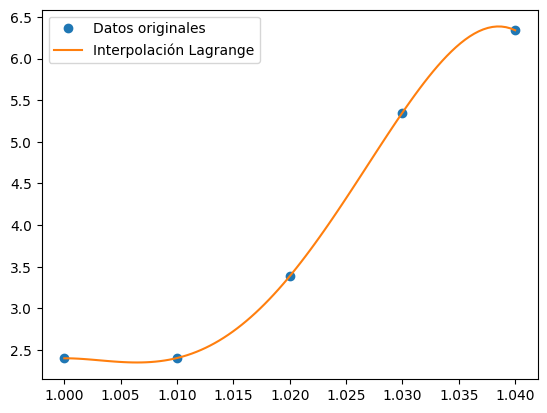

In [ ]:
r = 0.142
L = 0.98
I = [3.10, 3.12, 3.14, 3.18, 3.24]
T = [1, 1.01, 1.02, 1.03, 1.04]
t = np.linspace(1, 1.04, 100)
v = []
di_dt = dx_finite_points(I, T, 0.01) #Derivadas di/dt
for i in range(len(I)):
  v.append(L*di_dt[i] + R*I[i])
#hermite = CubicHermiteSpline(T, v, di_dt)
lagrange = lagrange(T, v) #Interpolación
plt.plot(T, v, 'o', label='Datos originales')
#plt.plot(t, hermite(t), label='Interpolación Hermite')# Se retiró por no funcinonar bien
plt.plot(t, lagrange(t), label='Interpolación Lagrange')
plt.legend()
plt.show()



# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

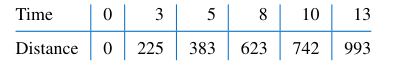



TypeError: poly1d.__call__() takes 2 positional arguments but 3 were given

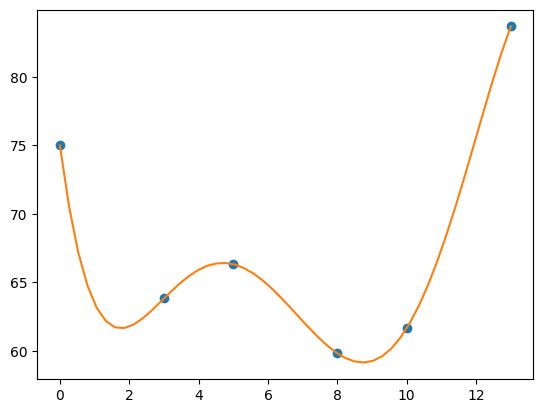

In [ ]:
from scipy.interpolate import lagrange
t = [0,3,5,8,10,13]
tprime = np.linspace(0,13,50)
y = [0, 225, 383, 623, 742, 993]
h = t[1] - t[0]
dy = dx_finite_points(y, t, h)
poly_lagrange = lagrange(t, dy)
plt.plot(t, dy, 'o')
plt.plot(tprime, poly_lagrange(tprime))

# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

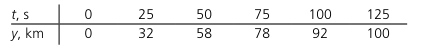

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

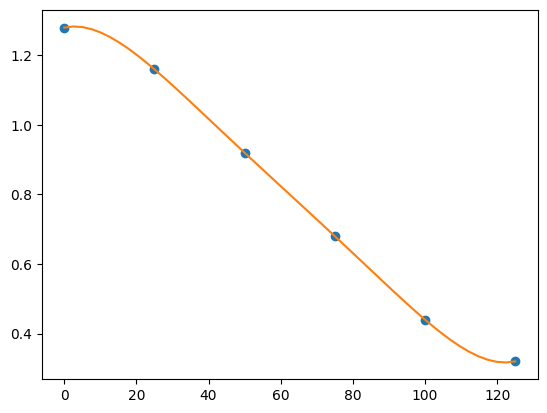

In [ ]:
s = [0, 25,50,75,100,125]
y = [0, 32, 58, 78, 92, 100]
h = s[1] - s[0]
s_prime = np.linspace(0,125,50)
dy = dx_finite_points(y, s, h)
poly_lagrange = lagrange(s, dy)
plt.plot(s, dy, 'o')
plt.plot(s_prime, poly_lagrange(s_prime))

#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

In [ ]:
z, R, k, q_tot = sp.symbols('z R k q_tot')
V = k*q_tot/sp.sqrt(z**2 + R**2)
V_z = sp.diff(V, z)
V_values = []
Z = [0.1e-3, 0.2e-3, 0.3e-3]
dZ = Z[1] - Z[0]
for i in Z:
    V_values.append(V.subs([(z, i), (R, 0.1e-3), (k, 8.99e9), (q_tot, 1e-6)]))
E = np.gradient(V_values,dZ)
print(E)
print('Campo a z = 1mm,', E[1])


[-2.33643974e+11 -1.75700117e+11 -1.17756261e+11]
Campo a z = 1mm, -175700117318.78442


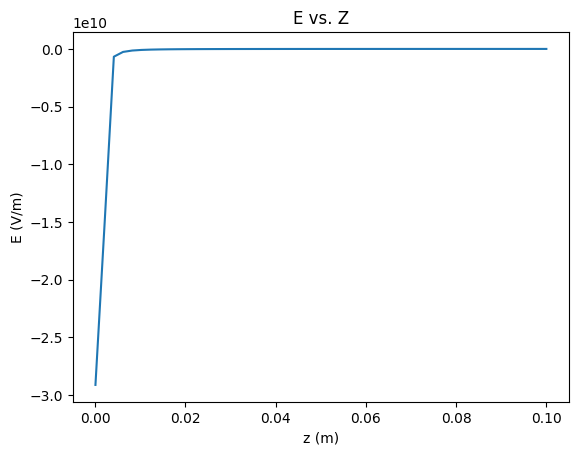

In [ ]:
z, R, k, q_tot = sp.symbols('z R k q_tot')
V = k*q_tot/sp.sqrt(z**2 + R**2)
V_z = sp.diff(V, z)
V_values = []
Z_distance = np.linspace(0.1e-3, 0.1, 50)
for i in Z_distance:
    V_values.append(V.subs([(z, float(i)), (R, 0.1e-3), (k, 8.99e9), (q_tot, 1e-6)]))
V_values = np.array(V_values, dtype=float)
E = np.gradient(V_values, Z_distance)
plt.plot(Z_distance, E)
plt.xlabel("z (m)")
plt.ylabel("E (V/m)")
plt.title("E vs. Z")
plt.show()